In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [207]:
pd.set_option('display.max_rows', 500)

## 1. repalce the missing values 

In [114]:
df = pd.read_csv('/users/zhengyiliang/Desktop/data&code/douban_book_collections/7digits_others/book_first_space.csv')

In [116]:
df.head()

,User_ID,book_id,rating,status,tag,title,total,updated_time
1,1000860,1036274.0,8.5,wish,童话,夏洛的网,182,2019-02-13 01:01:29
2,1000860,27608239.0,8.4,reading,思维,原则,182,2018-03-09 22:40:59
3,1000860,25975454.0,7.8,wish,创业,九败一胜,182,2014-09-16 17:32:27
4,1000860,25942507.0,7.5,wish,营销,参与感,182,2014-08-15 22:53:37
5,1000860,10571271.0,6.6,wish,创业,我为什么要投资你,182,2013-01-11 12:19:30


In [121]:
df_2 = df[['book_id', 'title']]

In [122]:
df_2.columns = ['book_id', 'title_2']

In [140]:
df_2.drop_duplicates('book_id', keep = 'first', inplace = True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_3.drop_duplicates('book_id', keep = 'first', inplace = True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
df_4 = pd.merge(df_2, df_3, on = 'book_id', how = 'inner', left_index = False, right_index = False)

In [149]:
df_new = pd.merge(df, df_4, on = 'book_id', how = 'outer', left_index = False, right_index = False)

In [157]:
df_new.reset_index(drop = True, inplace = True)

In [159]:
df_new.drop(['tag', 'title_2'], axis = 1, inplace = True)

## 2. describe the political books

### 2.1 time dispersion(box plot)

In [183]:
tags = ['政治哲学', '政治学','政治','自由主义', '威权主义', '马克思主义','极权主义', '民主', '社会主义', '资本主义', 
        '毛泽东', '邓小平', '文革']

In [184]:
tag1 = df[df.tag_1.isin(tags)]

In [185]:
tag2 = df[df.tag_2.isin(tags)]

In [186]:
tag3 = df[df.tag_3.isin(tags)]

In [187]:
df2 = pd.concat([tag1, tag2, tag3])

In [189]:
df2.drop_duplicates(keep = 'first', inplace = True)

In [193]:
df2.reset_index(drop = True, inplace = True)

In [241]:
df4 = df[df['pubdate'].dt.year > 2004]

In [196]:
df3 = df2[df2['pubdate'].dt.year > 2004]

In [249]:
l = list(df3['time_period'])

In [243]:
al = list(df['time_period'])

In [257]:
lol = []
for i in al:
    if i > 0:
        lol.append(i)

In [214]:
ll = []
for i in l:
    if i > 0:
        ll.append(i)

In [262]:
xlabel = ['Political Books', 'All Books']

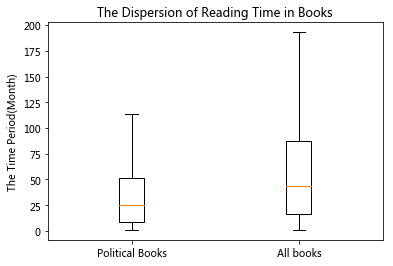

In [285]:
data = [ll, lol]
plt.boxplot(data, showfliers = False)
plt.xticks([1, 2], ['Political Books', 'All books'])
plt.title('The Dispersion of Reading Time in Books')
plt.ylabel('The Time Period(Month)')

plt.savefig('/users/zhengyiliang/Desktop/time_period2.png', bbox_inches='tight')

### 2.2 time variation through years

In [183]:
tags = ['政治哲学', '政治学','政治','自由主义', '威权主义', '马克思主义','极权主义', '民主', '社会主义', '资本主义', 
        '毛泽东', '邓小平', '文革']

In [184]:
tag1 = df[df.tag_1.isin(tags)]

In [185]:
tag2 = df[df.tag_2.isin(tags)]

In [186]:
tag3 = df[df.tag_3.isin(tags)]

In [187]:
df2 = pd.concat([tag1, tag2, tag3])

In [189]:
df2.drop_duplicates(keep = 'first', inplace = True)

In [193]:
df2.reset_index(drop = True, inplace = True)

In [306]:
df2.drop(['rating', 'updated_month_year', 'pubdate_month_year','time_period'], axis = 1, inplace = True)

In [288]:
df_1 = pd.read_csv('/users/zhengyiliang/Desktop/data&code/douban_book_collections/all_summary_bookid.csv')

In [290]:
tag_1 = df_1[df_1.tag_1.isin(tags)]

In [291]:
tag_2 = df_1[df_1.tag_2.isin(tags)]

In [292]:
tag_3 = df_1[df_1.tag_3.isin(tags)]

In [295]:
tag_books = pd.concat([tag_1, tag_2, tag_3])

In [297]:
tag_books.drop_duplicates(keep = 'first', inplace = True)

In [313]:
df3 = pd.concat([df2, tag_books], ignore_index = True)

In [354]:
#df3.dtypes

In [355]:
all_books = df3

In [356]:
data = all_books.drop_duplicates(['book_id'], keep = 'first')

In [357]:
data_1 = data[data.duplicated(['title'], keep = 'first')]

In [360]:
for i in data_1['title']:
    idx = all_books.index[all_books['title'] == i]
    book_id = all_books.loc[idx[0]]['book_id']
    for j in idx:
        all_books.set_value(j, 'book_id', book_id)

In [361]:
book = all_books['book_id']
book = pd.DataFrame(book, columns = ['book_id'])
book['frequency'] = book.groupby('book_id')['book_id'].transform('count')
book_all_1 = pd.concat([all_books, book], axis = 1, join ='outer') 

book_all = book_all_1.loc[:,~book_all_1.columns.duplicated()]
book_all.drop_duplicates(['book_id'], keep = 'first', inplace = True)
book_all.sort_values(by = ['frequency'], inplace = True, ascending = False)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


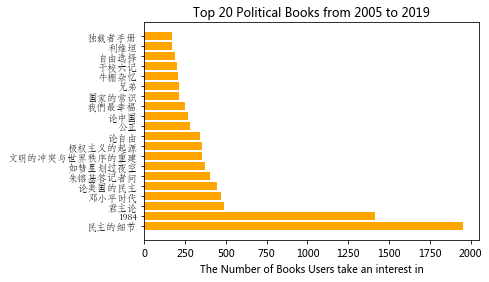

In [583]:
import matplotlib
top20 = list(book_all[:20]['title'])
#('1984','中国历代政治得失','民主的细节', '邓小平时代','中国国家治理的制度逻辑','辩论：美国制宪会议记录','历史深处的忧虑',
         #'通往奴役之路','君主论','独裁者手册')

y_pos = np.arange(len(top20))
number = list(book_all[:20]['frequency'])
#[95, 39, 26, 26, 18, 18, 15, 13, 13, 12]

font = matplotlib.font_manager.FontProperties(fname = r"/Library/Fonts/华文仿宋.ttf", size = 10)

plt.barh(y_pos, number, align ='center', color ='orange')
plt.yticks(y_pos, top20, fontproperties = font)
plt.xlabel('The Number of Books Users take an interest in')
plt.title('Top 20 Political Books from 2005 to 2019')

plt.savefig('/users/zhengyiliang/Desktop/all.pdf', bbox_inches='tight')
plt.show()

In [472]:
book_all = book_all[book_all['pubdate'].dt.year > 2004]

In [475]:
title = list(book_all['title'][:100])

In [478]:
#booklist = ['民主的细节']
booklist = title
freq = []
for i in booklist:
    data = all_books[all_books['title'] == i]
    y19 = len(data[data['updated_time'].dt.year == 2019])
    y18 = len(data[data['updated_time'].dt.year == 2018])
    y17 = len(data[data['updated_time'].dt.year == 2017])
    y16 = len(data[data['updated_time'].dt.year == 2016])
    y15 = len(data[data['updated_time'].dt.year == 2015])
    y14 = len(data[data['updated_time'].dt.year == 2014])
    y13 = len(data[data['updated_time'].dt.year == 2013])
    y12 = len(data[data['updated_time'].dt.year == 2012])
    y11 = len(data[data['updated_time'].dt.year == 2011])
    y10 = len(data[data['updated_time'].dt.year == 2010])
    y09 = len(data[data['updated_time'].dt.year == 2009])
    y08 = len(data[data['updated_time'].dt.year == 2008])
    y07 = len(data[data['updated_time'].dt.year == 2007])
    y06 = len(data[data['updated_time'].dt.year == 2006])
    y05 = len(data[data['updated_time'].dt.year == 2005])
    freq.append([y05, y06, y07, y08, y09, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19])

In [502]:
newfreq = []
for i in freq:
    newlist = []
    for j in i:
        if j != 0:
            newlist.append(j)
    newfreq.append(newlist)

In [555]:
for i in newfreq:
    i.extend([0 for j in range(15-len(i))])   

In [556]:
newfreq[:2]

[[225, 405, 445, 313, 200, 111, 68, 38, 56, 63, 30, 0, 0, 0, 0],
 [3, 124, 173, 121, 120, 107, 110, 132, 171, 240, 112, 0, 0, 0, 0]]

In [557]:
for i in newfreq:
    for j, k in enumerate(i):
        if k == 0:
            i[j] = None

In [558]:
newfreq[:5]

[[225, 405, 445, 313, 200, 111, 68, 38, 56, 63, 30, None, None, None, None],
 [3, 124, 173, 121, 120, 107, 110, 132, 171, 240, 112, None, None, None, None],
 [6, 17, 58, 85, 64, 41, 57, 28, 17, 22, 15, 25, 34, 17, None],
 [5, 6, 2, 6, 24, 177, 55, 40, 29, 43, 57, 29, None, None, None],
 [1, 2, 17, 29, 52, 48, 66, 59, 42, 28, 18, 21, 21, 25, 15]]

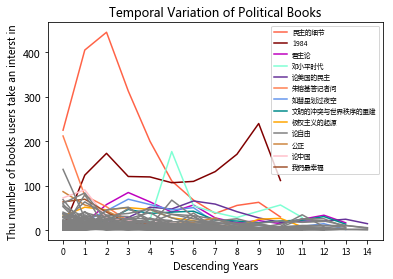

In [559]:
x = range(0,15)
y =  newfreq[0]
plt.plot(x, y, color = 'tomato', label = title[0])
y12 = newfreq[1]
plt.plot(x, y12, color = 'maroon', label = title[1] )
y1 = newfreq[2]
plt.plot(x, y1, color = 'm', label = title[2] )
y2 = newfreq[3]
plt.plot(x, y2, color = 'aquamarine', label = title[3])
y3 = newfreq[4]
plt.plot(x, y3, color = 'rebeccapurple', label = title[4])
y4 = newfreq[5]
plt.plot(x, y4, color = 'coral', label = title[5])
y5 = newfreq[6]
plt.plot(x, y5, color = 'cornflowerblue', label = title[6])
y6 = newfreq[7]
plt.plot(x, y6, color = 'darkcyan', label = title[7])
y7 = newfreq[8]
plt.plot(x, y7, color = 'orange', label = title[8])
y8 = newfreq[9]
plt.plot(x, y8, color = 'gray', label = title[9] )
y9 = newfreq[10]
plt.plot(x, y9, color = 'peru', label = title[10])
y10 = newfreq[11]
plt.plot(x, y10, color = 'pink', label = title[11])
y11 = newfreq[12]
plt.plot(x, y11, color = 'sienna', label =title[12])

for i in newfreq[13:]:
    y12 = i
    plt.plot(x, y12, color = 'gray')
    
plt.xticks(range(0,15), Fontsize = 8)
#plt.ylim(-5, 40)
plt.xlabel('Descending Years')
plt.ylabel('Thu number of books users take an interst in')
plt.title('Temporal Variation of Political Books')

plt.legend(fontsize = 6.5)
#plt.savefig('/users/zhengyiliang/Desktop/temporal_variation.pdf', bbox_inches='tight')
plt.show()

### compute zscore

In [518]:
u = []
for i in range(2005, 2020):
    book_y =all_books[all_books['updated_time'].dt.year == i] 
    x = len(book_y)/len(book_y.drop_duplicates(['book_id'], inplace = False))
    u.append(x)    

In [514]:
u = dict(zip(range(2005, 2020), u))

In [516]:
std = []
for i in range(2005, 2020):
    l = []
    book_y = all_books[all_books['updated_time'].dt.year == i] 
    book_y.reset_index(drop = True, inplace = True)
    book = book_y['book_id']
    book = pd.DataFrame(book, columns = ['book_id'])
    book['frequency'] = book.groupby('book_id')['book_id'].transform('count')
    book_new = book.drop_duplicates(['book_id'], inplace = False)
    
    for j in book_new['frequency']:
        s = np.square(j - u[i])
        l.append(s)
    std_y = np.sqrt(sum(l)/len(book_new))
    std.append(std_y)    

In [520]:
zscore = []
for j in freq:
    zbook = []
    for i in j:
        idx = j.index(i)
        z = (i - u[idx])/std[idx]
        zbook.append(z)
    zscore.append(zbook)

In [526]:
freq_zscore = []
for i in range(100):
    num = 15 - len(newfreq[i])
    freq_z = []
    for j in range(num, 15):
        freq_z.append(zscore[i][j])
    freq_zscore.append(freq_z)       

In [544]:
for i in freq_zscore:
    i.extend([0 for j in range(15-len(i))]) 

In [548]:
for i in freq_zscore:
    for j, k in enumerate(i):
        if k == 0:
            i[j] = None

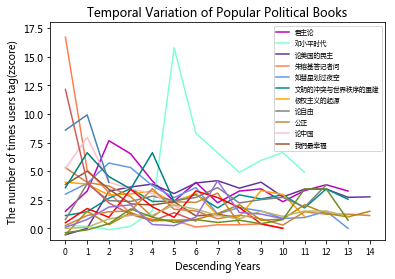

In [578]:
x = range(0,15)
#y =  freq_zscore[0]
#plt.plot(x, y, color = 'tomato', label = title[0])
#y12 = freq_zscore[1]
#plt.plot(x, y12, color = 'maroon', label = title[1] )
y1 = freq_zscore[2]
plt.plot(x, y1, color = 'm', label = title[2] )
y2 = freq_zscore[3]
plt.plot(x, y2, color = 'aquamarine', label = title[3])
y3 = freq_zscore[4]
plt.plot(x, y3, color = 'rebeccapurple', label = title[4])
y4 = freq_zscore[5]
plt.plot(x, y4, color = 'coral', label = title[5])
y5 = freq_zscore[6]
plt.plot(x, y5, color = 'cornflowerblue', label = title[6])
y6 = freq_zscore[7]
plt.plot(x, y6, color = 'darkcyan', label = title[7])
y7 = freq_zscore[8]
plt.plot(x, y7, color = 'orange', label = title[8])
y8 = freq_zscore[9]
plt.plot(x, y8, color = 'gray', label = title[9] )
y9 = freq_zscore[10]
plt.plot(x, y9, color = 'peru', label = title[10])
y10 = freq_zscore[11]
plt.plot(x, y10, color = 'pink', label = title[11])
y11 = freq_zscore[12]
plt.plot(x, y11, color = 'sienna', label =title[12])

y13 = freq_zscore[13]
plt.plot(x, y13, color = 'indianred')
y14 = freq_zscore[14]
plt.plot(x, y14, color = 'red')
y15 = freq_zscore[15]
plt.plot(x, y15, color = 'peru')
y16 = freq_zscore[16]
plt.plot(x, y16, color = 'darkgoldenrod')
y17 = freq_zscore[17]
plt.plot(x, y17, color = 'darkkhaki')
y18 = freq_zscore[18]
plt.plot(x, y18, color = 'olivedrab')
y19 = freq_zscore[19]
plt.plot(x, y19, color = 'teal')
y20 = freq_zscore[20]
plt.plot(x, y20, color = 'steelblue')
y21 = freq_zscore[21]
plt.plot(x, y21, color = 'mediumpurple')



#for i in freq_zscore[21:25]:
    #y100 = i
    #plt.plot(x, y100, color = 'gray')
    
plt.xticks(range(0,15), Fontsize = 8)
plt.ylim(-1, 18)
plt.xlabel('Descending Years')
plt.ylabel('The number of times users tag (zscore)')
plt.title('Temporal Variation of Popular Political Books')

plt.legend(fontsize = 6.5)
plt.savefig('/users/zhengyiliang/Desktop/temporal_variation_zscore2.pdf', bbox_inches='tight')
plt.show()

### case study

In [424]:
new = [j for i in freq for j in i if j != 0]

In [453]:
listOfnum = [12, 44, 56, 45, 34, 3, 4, 0, 0]
for elem in listOfnum:
    if elem == 0:
        listOfnum.remove(elem)

In [435]:
for i in freq[0]:
    if i == 0:
        freq[0].remove(i)

In [462]:
newfreq = []
for i in freq:
    newlist = []
    for j in i:
        if j != 0:
            newlist.append(j)
    newfreq.append(newlist)

In [466]:
for i in newfreq:
    i.extend([0 for j in range(15-len(i))])   

In [401]:
for i in freq:
    for j, k in enumerate(i):
        if k == 0:
            i[j] = None

In [ ]:
#data1
x=['200101','200102','200103','200104','200105','200106','200107','200108',
   '200109','200110','200111','200112','200201','200202','200203','200204',
   '200205','200206','200207','200208','200209']
x = [dt.datetime.strptime(i, '%Y%m') for i in x] 
y=[30.2,37.6,34.7,27.1,31.9,43.9,42.4,42.3,34.4,40.0,47.2,
   40.8,34.7,27.1,31.9,43.9,42.4,42.3,34.4,40.0,47.2]

#data2   
q=['200106','200107','200108','200206','200207','200208']
q = [dt.datetime.strptime(i, '%Y%m') for i in q] 
w=[19.7,18.6,15.2,17.3,16.9,18.2]

for i, xi in enumerate(x):
    if xi not in q:
        w.insert(i, None)

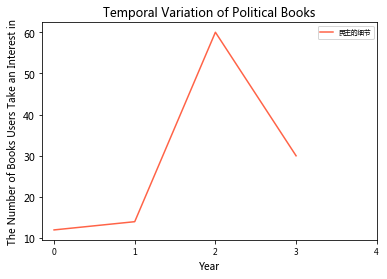

In [376]:
x = range(0,5)
y =  [12, 14, 60,30, None]

plt.plot(x, y, color = 'tomato', label = '民主的细节' )
#y12 = freq_1984
#plt.plot(x, y12, color = 'maroon', label = '1984' )
#y1 = freq[1]
#plt.plot(x, y1, color = 'm', label = '中国历代政治得失' )

plt.xticks(range(0, 5), Fontsize = 8)
#plt.yticks([200, 300, 400, 500])
plt.xlabel('Year')
plt.ylabel('The Number of Books Users Take an Interest in')
plt.title('Temporal Variation of Political Books')

plt.legend(fontsize = 6.5)
#plt.savefig('/users/zhengyiliang/Desktop/temporal_variation.png', bbox_inches='tight')
plt.show()